# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Analysis

Latitude vs temperature plots proves the point that as you get closer to north away from equator, the temperature drops as well as same applies to the south. With humidity, cloudiness and wind speed seems evenly spread through out the latitude. 
Looking at north hemisphere specifically, temperature drops as latitude increase, there’s a strong negative correlation with the Latitude vs Temperature plot for north hemisphere. Looking specifically at southern hemisphere, temperature goes up as latitude decreases or as the cities are located close to the equator. It does show a strong correlation between latitude and temperature.  There wasn’t any huge differences comparing wind speed, humidity and cloudiness with north and south hemisphere. 


In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [12]:
# Output File (CSV)
output_data_file = "output/cities.csv"
#city_data = pd.read_csv(output_data_file)
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#city_data

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



620

In [14]:
#cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
sample_city = ["ostrovnoy","zhuhai","Hars", "New York","new norfolk"]
#cities = []
#response = requests.get(query_url + "Paris").json()


# set up lists to hold reponse info
lat = []
lon = []
max_temp = []
humidity = []
cloud = []
wind_speed = []
city_name = []
country =[]
date =[]

city_id = 1
record_count = 1
set_count = 1
print("Beginning Data Retrieval")
print("=========================")
# Loop through the list of cities and perform a request for data on each
#for city in cities:
#for city in sample_city:
for i, city in enumerate(cities):
   


    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    response = requests.get(query_url + city).json()
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    print("----------")
    record_count += 1    
    
    
    try:
        lat.append(response['coord']['lat'])
        lon.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        #print(f"Processing {city_id} - {city} found")
        #city_id += 1
        
        
        #print(json.dumps(response, indent=4, sort_keys=False))
    
    except:
        print(f"{city} not found, skipping")
        print("------------")
        pass
        

Beginning Data Retrieval
Processing Record 1 of Set 1 | saint-philippe
----------
Processing Record 2 of Set 1 | bluff
----------
Processing Record 3 of Set 1 | artyk
----------
artyk not found, skipping
------------
Processing Record 4 of Set 1 | kruisfontein
----------
Processing Record 5 of Set 1 | rikitea
----------
Processing Record 6 of Set 1 | borlange
----------
borlange not found, skipping
------------
Processing Record 7 of Set 1 | kapaa
----------
Processing Record 8 of Set 1 | chokurdakh
----------
Processing Record 9 of Set 1 | vaini
----------
Processing Record 10 of Set 1 | santa isabel do rio negro
----------
Processing Record 11 of Set 1 | cienfuegos
----------
Processing Record 12 of Set 1 | vaitupu
----------
vaitupu not found, skipping
------------
Processing Record 13 of Set 1 | albany
----------
Processing Record 14 of Set 1 | jamestown
----------
Processing Record 15 of Set 1 | tasiilaq
----------
Processing Record 16 of Set 1 | butaritari
----------
Processing R

Processing Record 41 of Set 3 | waipawa
----------
Processing Record 42 of Set 3 | lorengau
----------
Processing Record 43 of Set 3 | byron bay
----------
Processing Record 44 of Set 3 | tongren
----------
Processing Record 45 of Set 3 | joao pessoa
----------
Processing Record 46 of Set 3 | lagoa
----------
Processing Record 47 of Set 3 | faanui
----------
Processing Record 48 of Set 3 | chuy
----------
Processing Record 49 of Set 3 | victoria
----------
Processing Record 50 of Set 3 | nome
----------
Processing Record 1 of Set 4 | khonsar
----------
khonsar not found, skipping
------------
Processing Record 2 of Set 4 | marzuq
----------
Processing Record 3 of Set 4 | khonuu
----------
khonuu not found, skipping
------------
Processing Record 4 of Set 4 | pangnirtung
----------
Processing Record 5 of Set 4 | muros
----------
Processing Record 6 of Set 4 | fairbanks
----------
Processing Record 7 of Set 4 | amderma
----------
amderma not found, skipping
------------
Processing Record

Processing Record 43 of Set 6 | kloulklubed
----------
Processing Record 44 of Set 6 | solovetskiy
----------
solovetskiy not found, skipping
------------
Processing Record 45 of Set 6 | pitimbu
----------
Processing Record 46 of Set 6 | laviana
----------
Processing Record 47 of Set 6 | zeya
----------
Processing Record 48 of Set 6 | yaan
----------
Processing Record 49 of Set 6 | hualmay
----------
Processing Record 50 of Set 6 | ilulissat
----------
Processing Record 1 of Set 7 | halalo
----------
halalo not found, skipping
------------
Processing Record 2 of Set 7 | tual
----------
Processing Record 3 of Set 7 | dakar
----------
Processing Record 4 of Set 7 | bud
----------
Processing Record 5 of Set 7 | shelburne
----------
Processing Record 6 of Set 7 | petropavlovsk-kamchatskiy
----------
Processing Record 7 of Set 7 | moron
----------
Processing Record 8 of Set 7 | burkhala
----------
burkhala not found, skipping
------------
Processing Record 9 of Set 7 | noumea
----------
Pro

Processing Record 41 of Set 9 | laguna
----------
Processing Record 42 of Set 9 | carnarvon
----------
Processing Record 43 of Set 9 | qinzhou
----------
Processing Record 44 of Set 9 | mayo
----------
Processing Record 45 of Set 9 | vestmannaeyjar
----------
Processing Record 46 of Set 9 | okha
----------
Processing Record 47 of Set 9 | imbituba
----------
Processing Record 48 of Set 9 | baghmara
----------
Processing Record 49 of Set 9 | xinyu
----------
Processing Record 50 of Set 9 | vire
----------
Processing Record 1 of Set 10 | viedma
----------
Processing Record 2 of Set 10 | quatre cocos
----------
Processing Record 3 of Set 10 | cleburne
----------
Processing Record 4 of Set 10 | straumen
----------
Processing Record 5 of Set 10 | ardrishaig
----------
Processing Record 6 of Set 10 | seoul
----------
Processing Record 7 of Set 10 | marsa matruh
----------
Processing Record 8 of Set 10 | gilroy
----------
Processing Record 9 of Set 10 | pacific grove
----------
Processing Reco

Processing Record 34 of Set 12 | saint anthony
----------
Processing Record 35 of Set 12 | fukue
----------
Processing Record 36 of Set 12 | abu samrah
----------
Processing Record 37 of Set 12 | laje
----------
Processing Record 38 of Set 12 | guanambi
----------
Processing Record 39 of Set 12 | helong
----------
Processing Record 40 of Set 12 | korla
----------
Processing Record 41 of Set 12 | bardiyah
----------
Processing Record 42 of Set 12 | dudinka
----------
Processing Record 43 of Set 12 | shimanovsk
----------
Processing Record 44 of Set 12 | susanville
----------
Processing Record 45 of Set 12 | clyde river
----------
Processing Record 46 of Set 12 | baherden
----------
Processing Record 47 of Set 12 | mentok
----------
mentok not found, skipping
------------
Processing Record 48 of Set 12 | tumaco
----------
Processing Record 49 of Set 12 | radishchevo
----------
Processing Record 50 of Set 12 | saleaula
----------
saleaula not found, skipping
------------
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
#api dataframe
city_data = pd.DataFrame({
    "City":city_name,
    "Country":country,
    "Max Temp": max_temp,
    "Date":date,
   "Cloudiness":cloud,
   "Lat":lat,
    "Lng":lon,
    "Wind Speed": wind_speed,
    "Humidity":humidity})

city_data

,City,Country,Max Temp,Date,Cloudiness,Lat,Lng,Wind Speed,Humidity
0,Saint-Philippe,RE,75.20,1619895769,0,-21.3585,55.7679,5.75,78
1,Bluff,NZ,48.00,1619895552,15,-46.6000,168.3333,3.00,86
2,Kruisfontein,ZA,53.01,1619895805,0,-34.0033,24.7314,2.28,85
3,Rikitea,PF,76.21,1619895753,98,-23.1203,-134.9692,12.91,80
4,Kapaa,US,77.00,1619895749,20,22.0752,-159.3190,11.50,78
...,...,...,...,...,...,...,...,...,...
556,Vrangel',RU,40.15,1619895943,100,42.7297,133.0839,1.90,91
557,Ulaanbaatar,MN,46.40,1619895943,40,47.9077,106.8832,26.84,19
558,Malanje,AO,65.03,1619895906,98,-9.5402,16.3410,7.16,95
559,Minoh,JP,57.00,1619895944,37,34.8269,135.4706,1.99,81


In [17]:
city_data.to_csv("WeatherPy/WeatherPy.csv",encoding="utf-8",index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
clean_city_data = city_data.loc[city_data["Humidity"] <= 100]
clean_city_data

,City,Country,Max Temp,Date,Cloudiness,Lat,Lng,Wind Speed,Humidity
0,Saint-Philippe,RE,75.20,1619895769,0,-21.3585,55.7679,5.75,78
1,Bluff,NZ,48.00,1619895552,15,-46.6000,168.3333,3.00,86
2,Kruisfontein,ZA,53.01,1619895805,0,-34.0033,24.7314,2.28,85
3,Rikitea,PF,76.21,1619895753,98,-23.1203,-134.9692,12.91,80
4,Kapaa,US,77.00,1619895749,20,22.0752,-159.3190,11.50,78
...,...,...,...,...,...,...,...,...,...
556,Vrangel',RU,40.15,1619895943,100,42.7297,133.0839,1.90,91
557,Ulaanbaatar,MN,46.40,1619895943,40,47.9077,106.8832,26.84,19
558,Malanje,AO,65.03,1619895906,98,-9.5402,16.3410,7.16,95
559,Minoh,JP,57.00,1619895944,37,34.8269,135.4706,1.99,81


In [19]:
#  Get the indices of cities that have humidity over 100%.
clean_city_data.describe()

,Max Temp,Date,Cloudiness,Lat,Lng,Wind Speed,Humidity
count,561.000000,5.610000e+02,561.000000,561.000000,561.000000,561.000000,561.000000
mean,62.271943,1.619896e+09,51.333333,21.369930,19.325639,8.066684,68.395722
std,20.453449,9.684033e+01,39.828935,33.104562,92.301478,5.137061,22.772953
min,0.810000,1.619896e+09,0.000000,-54.800000,-179.166700,0.540000,4.000000
25%,48.200000,1.619896e+09,9.000000,-5.895800,-62.398900,4.250000,54.000000
50%,65.100000,1.619896e+09,46.000000,25.533300,23.104700,6.910000,73.000000
75%,79.000000,1.619896e+09,96.000000,49.141400,104.043900,10.710000,87.000000
max,104.000000,1.619896e+09,100.000000,78.218600,179.316700,29.930000,100.000000


In [20]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [25]:
today = date.today()
d = today.strftime("%m/%d/%Y")
d

'05/01/2021'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

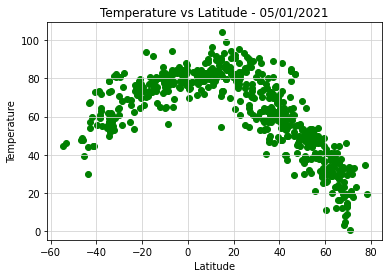

In [26]:
#Temp vs Lat   #change df name

plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"], marker="o", color="green")
plt.title(f"Temperature vs Latitude - {d}")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig('WeatherPy/temp_lat.png')
plt.show()


## Latitude vs. Humidity Plot

In [ ]:
#Humidity vs Lat #change df name

plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"], marker="o", color="green")
plt.title(f"Humidity vs Latitude - {d}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig('WeatherPy/hum_lat.png')
plt.show()

## Latitude vs. Cloudiness Plot

In [ ]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"], marker="o", color="green")
plt.title(f"Cloudiness vs Latitude - {d}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig('WeatherPy/cloud_lat.png')
plt.show()

## Latitude vs. Wind Speed Plot

In [ ]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"], marker="o", color="green")
plt.title(f"Wind speed vs Latitude - {d}")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig('WeatherPy/wind_lat.png')
plt.show()

## Linear Regression

In [ ]:
north = clean_city_data.loc[(clean_city_data["Lat"] >= 0)]
north
south = clean_city_data.loc[(clean_city_data["Lat"] <= 0)]
south

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values = north["Lat"]
y_values = north["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "red")
plt.plot(x_values,regress_values,"r-",color = "green")
plt.title("Northern - Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.annotate(line_eq,(5,20),fontsize=15,color="green")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('WeatherPy/north_temp_lat.png')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:

x_values = north["Lat"]
y_values = north["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "red")
plt.plot(x_values,regress_values,"r-",color = "green")
plt.title(" Northern - Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(50,12),fontsize=15,color="green")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('WeatherPy/north_hum_lat.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = north["Lat"]
y_values = north["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "red")
plt.plot(x_values,regress_values,"r-",color = "green")
plt.title(" Northern - Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(75,5),fontsize=15,color="green")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('WeatherPy/north_cloud_lat.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = north["Lat"]
y_values = north["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "red")
plt.plot(x_values,regress_values,"r-",color = "green")
plt.title(" Northern - Wind speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.annotate(line_eq,(0,25),fontsize=15,color="green")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('WeatherPy/north_wind_lat.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values = south["Lat"]
y_values = south["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "blue")
plt.plot(x_values,regress_values,"r-",color="green")
plt.title("Southern - Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.annotate(line_eq,(-25,40),fontsize=15,color="green")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('WeatherPy/south_temp_lat.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = south["Lat"]
y_values = south["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "blue")
plt.plot(x_values,regress_values,"r-",color="green")
plt.title("Southern - Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(-5,30),fontsize=15,color="green")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('WeatherPy/south_hum_lat.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = south["Lat"]
y_values = south["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "blue")
plt.plot(x_values,regress_values,"r-",color="green")
plt.title("Southern - Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(-10,0),fontsize=15,color="green")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('WeatherPy/south_cloud_lat.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = south["Lat"]
y_values = south["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "blue")
plt.plot(x_values,regress_values,"r-",color="green")
plt.title("Southern - Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.annotate(line_eq,(-20,20),fontsize=15,color="green")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('WeatherPy/south_wind_lat.png')
plt.show()